# Start

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
from scipy import stats
from statsmodels.stats.proportion import proportions_ztest

In [2]:
df = pd.read_csv('AB_Test_Results.csv')
df.head()

,USER_ID,VARIANT_NAME,REVENUE
0,737,variant,0.0
1,2423,control,0.0
2,9411,control,0.0
3,7311,control,0.0
4,6174,variant,0.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   USER_ID       10000 non-null  int64  
 1   VARIANT_NAME  10000 non-null  object 
 2   REVENUE       10000 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 234.5+ KB


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
USER_ID,10000.0,4981.080200,2890.590115,2.0,2468.75,4962.0,7511.5,10000.00
REVENUE,10000.0,0.099447,2.318529,0.0,0.00,0.0,0.0,196.01


In [5]:
df['VARIANT_NAME'].value_counts()

VARIANT_NAME
variant    5016
control    4984
Name: count, dtype: int64

<Axes: xlabel='VARIANT_NAME', ylabel='REVENUE'>

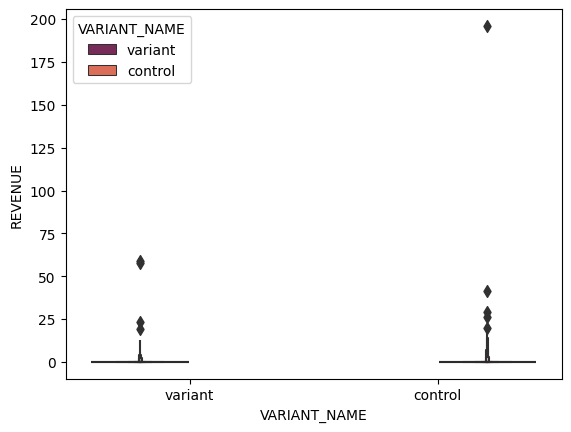

In [6]:
sns.boxenplot(
  df[['VARIANT_NAME', 'REVENUE']], 
  x = "VARIANT_NAME",
  y = 'REVENUE',
  hue="VARIANT_NAME", 
  palette='rocket'
)

# Removing duplicates

We remove the users that are both Variant and Control.

In [7]:
# df[df.duplicated()]

In [8]:
# #  remove USER_ID who have two groups

# duplicates = (df.groupby("USER_ID")["VARIANT_NAME"].nunique() == 1)
# duplicates = duplicates[duplicates]

# # USER_ID_nunique data

# df = df[df["USER_ID"].isin(duplicates.index)]

In [9]:
df.groupby("USER_ID")["VARIANT_NAME"].nunique()

USER_ID
2        1
3        2
4        1
5        1
6        1
        ..
9993     1
9995     1
9996     2
9998     1
10000    2
Name: VARIANT_NAME, Length: 6324, dtype: int64

In [10]:
df['USER_ID'].value_counts()

USER_ID
5652    6
8359    6
668     6
9101    6
4879    6
       ..
5455    1
1399    1
6967    1
3156    1
9468    1
Name: count, Length: 6324, dtype: int64

In [11]:
print(df[df['USER_ID']==2])
print(df[df['USER_ID']==5652])
print(df[df['USER_ID']==9995])

      USER_ID VARIANT_NAME  REVENUE
2406        2      control      0.0
3479        2      control      0.0
7076        2      control      0.0
      USER_ID VARIANT_NAME  REVENUE
595      5652      control      0.0
778      5652      control      0.0
2880     5652      control      0.0
6327     5652      control      0.0
7248     5652      control      0.0
7972     5652      control      0.0
      USER_ID VARIANT_NAME  REVENUE
2749     9995      variant      0.0
5673     9995      variant      0.0


In [12]:
# df.drop_duplicates(inplace=True)

In [13]:
# rows_to_keep = df['USER_ID'].value_counts()==1
# rows_to_keep = rows_to_keep[rows_to_keep]
# df = df[df['USER_ID'].isin(rows_to_keep.index)]

rows_to_keep = (df.groupby("USER_ID")["VARIANT_NAME"].nunique() == 1)
rows_to_keep = rows_to_keep[rows_to_keep]
df = df[df['USER_ID'].isin(rows_to_keep.index)]

In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
USER_ID,6070.0,4983.664086,2897.990118,2.0,2472.25,4950.0,7501.0,9998.00
REVENUE,6070.0,0.107064,2.673501,0.0,0.00,0.0,0.0,196.01


In [15]:
df['VARIANT_NAME'].value_counts()

VARIANT_NAME
variant    3044
control    3026
Name: count, dtype: int64

<Axes: xlabel='VARIANT_NAME', ylabel='REVENUE'>

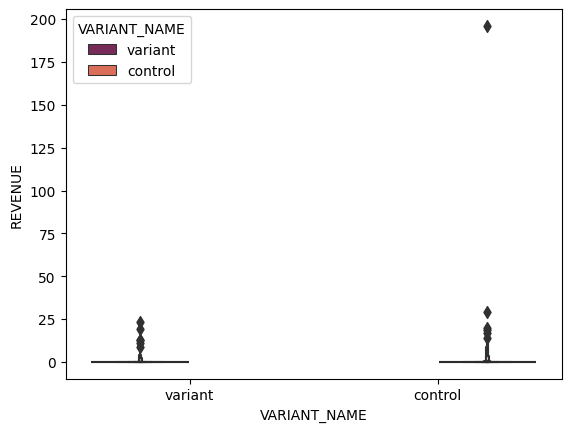

In [16]:
sns.boxenplot(
  df[['VARIANT_NAME', 'REVENUE']], 
  x = "VARIANT_NAME",
  y = 'REVENUE',
  hue="VARIANT_NAME", 
  palette='rocket'
)

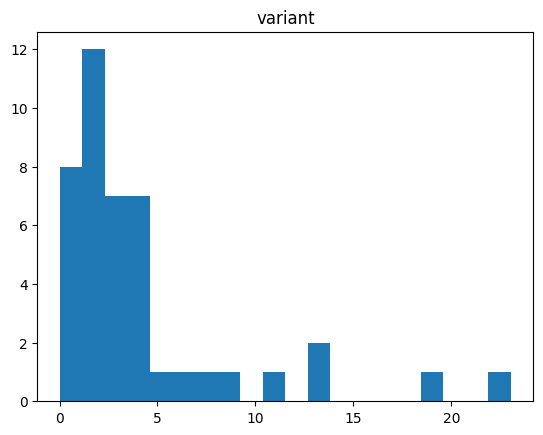

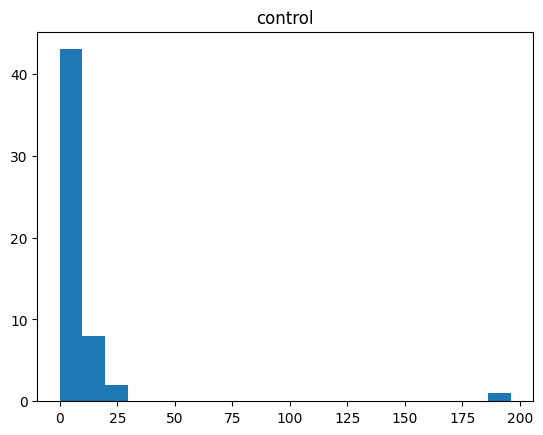

In [17]:
plt.hist(df[(df['VARIANT_NAME'] == 'variant') & (df['REVENUE'] != 0)]['REVENUE'], bins =20)
plt.title('variant')
plt.show()

plt.hist(df[(df['VARIANT_NAME'] == 'control') & (df['REVENUE'] != 0)]['REVENUE'], bins =20)
plt.title('control')
plt.show()

# Removing outliers

In [18]:
# index_to_drop = df[(df['REVENUE'] >= 10) & (df['VARIANT_NAME'] == 'variant')].index
# df.drop(index=index_to_drop, inplace= True)
index_to_drop =  df[(df['REVENUE'] >= 25)].index
df.drop(index=index_to_drop, inplace= True)

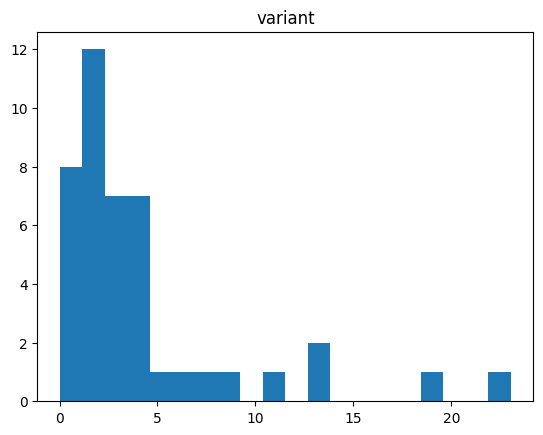

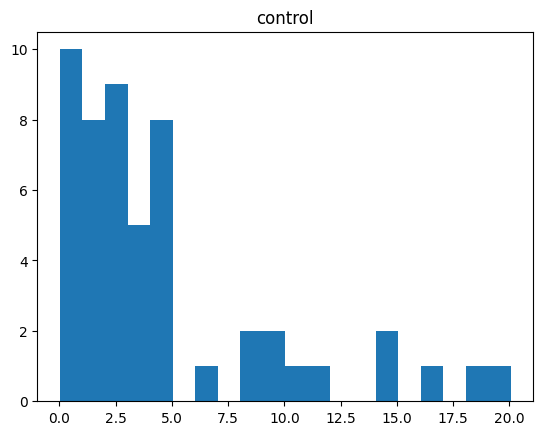

In [19]:
plt.hist(df[(df['VARIANT_NAME'] == 'variant') & (df['REVENUE'] != 0)]['REVENUE'], bins =20)
plt.title('variant')
plt.show()

plt.hist(df[(df['VARIANT_NAME'] == 'control') & (df['REVENUE'] != 0)]['REVENUE'], bins =20)
plt.title('control')
plt.show()

<Axes: xlabel='VARIANT_NAME', ylabel='REVENUE'>

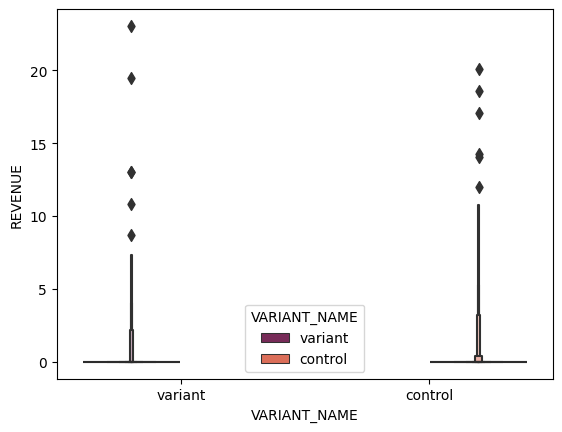

In [20]:
sns.boxenplot(
  df[['VARIANT_NAME', 'REVENUE']], 
  x = "VARIANT_NAME",
  y = 'REVENUE',
  hue="VARIANT_NAME", 
  palette='rocket'
)

In [21]:
df['BOUGHT'] = np.where(df['REVENUE'] == 0, 0, 1)

In [22]:
df['BOUGHT'].value_counts()

BOUGHT
0    5973
1      95
Name: count, dtype: int64

In [23]:
df.groupby(['VARIANT_NAME', 'BOUGHT'])['BOUGHT'].count()

VARIANT_NAME  BOUGHT
control       0         2972
              1           52
variant       0         3001
              1           43
Name: BOUGHT, dtype: int64

In [24]:
df.reset_index(drop=True, inplace=True)

# New dataframes

In [25]:
df_userid_revenue = pd.DataFrame(df.groupby(['USER_ID', 'VARIANT_NAME'])['REVENUE'].sum()).reset_index()
df_userid_revenue

,USER_ID,VARIANT_NAME,REVENUE
0,2,control,0.0
1,4,variant,0.0
2,5,variant,0.0
3,6,variant,0.0
4,9,variant,0.0
...,...,...,...
4777,9990,variant,0.0
4778,9992,control,0.0
4779,9993,control,0.0
4780,9995,variant,0.0


In [26]:
df_userid_interaction = df[['USER_ID', 'VARIANT_NAME', 'REVENUE']].groupby(['USER_ID', 'VARIANT_NAME']).agg(INTERACTIONS=('REVENUE', 'count')).reset_index()
# df_userid_interaction = df[['USER_ID', 'VARIANT_NAME', 'REVENUE']].groupby(['USER_ID', 'VARIANT_NAME']).count().reset_index()
# df_userid_interaction.rename(columns={'REVENUE': 'INTERACTIONS'}, inplace=True)
df_userid_interaction

,USER_ID,VARIANT_NAME,INTERACTIONS
0,2,control,3
1,4,variant,1
2,5,variant,1
3,6,variant,1
4,9,variant,1
...,...,...,...
4777,9990,variant,1
4778,9992,control,1
4779,9993,control,1
4780,9995,variant,2


In [27]:
df_userid_bought = df[['USER_ID', 'VARIANT_NAME', 'BOUGHT']].groupby(['USER_ID', 'VARIANT_NAME']).agg(BOUGHTS=('BOUGHT', 'sum')).reset_index()
df_userid_bought

,USER_ID,VARIANT_NAME,BOUGHTS
0,2,control,0
1,4,variant,0
2,5,variant,0
3,6,variant,0
4,9,variant,0
...,...,...,...
4777,9990,variant,0
4778,9992,control,0
4779,9993,control,0
4780,9995,variant,0


In [28]:
# pd.concat([df_userid_revenue, df_userid_interaction, df_userid_bought], axis=1)
df_grouped_users = pd.merge(df_userid_revenue, df_userid_interaction, on=['USER_ID', 'VARIANT_NAME']).merge(df_userid_bought, on=['USER_ID', 'VARIANT_NAME'])
df_grouped_users

,USER_ID,VARIANT_NAME,REVENUE,INTERACTIONS,BOUGHTS
0,2,control,0.0,3,0
1,4,variant,0.0,1,0
2,5,variant,0.0,1,0
3,6,variant,0.0,1,0
4,9,variant,0.0,1,0
...,...,...,...,...,...
4777,9990,variant,0.0,1,0
4778,9992,control,0.0,1,0
4779,9993,control,0.0,1,0
4780,9995,variant,0.0,2,0


In [29]:
df_grouped_users['CONVERTION_RATE'] = df_grouped_users['BOUGHTS'] / df_grouped_users['INTERACTIONS']
df_grouped_users['NO_BOUGHTS'] = df_grouped_users['INTERACTIONS'] - df_grouped_users['BOUGHTS']
df_grouped_users

,USER_ID,VARIANT_NAME,REVENUE,INTERACTIONS,BOUGHTS,CONVERTION_RATE,NO_BOUGHTS
0,2,control,0.0,3,0,0.0,3
1,4,variant,0.0,1,0,0.0,1
2,5,variant,0.0,1,0,0.0,1
3,6,variant,0.0,1,0,0.0,1
4,9,variant,0.0,1,0,0.0,1
...,...,...,...,...,...,...,...
4777,9990,variant,0.0,1,0,0.0,1
4778,9992,control,0.0,1,0,0.0,1
4779,9993,control,0.0,1,0,0.0,1
4780,9995,variant,0.0,2,0,0.0,2


<Axes: xlabel='VARIANT_NAME', ylabel='REVENUE'>

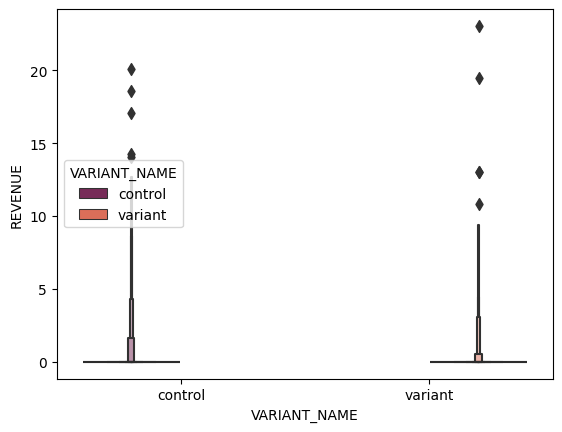

In [30]:
sns.boxenplot(
  df_grouped_users[['VARIANT_NAME', 'REVENUE']], 
  x = "VARIANT_NAME",
  y = 'REVENUE',
  hue="VARIANT_NAME", 
  palette='rocket'
)

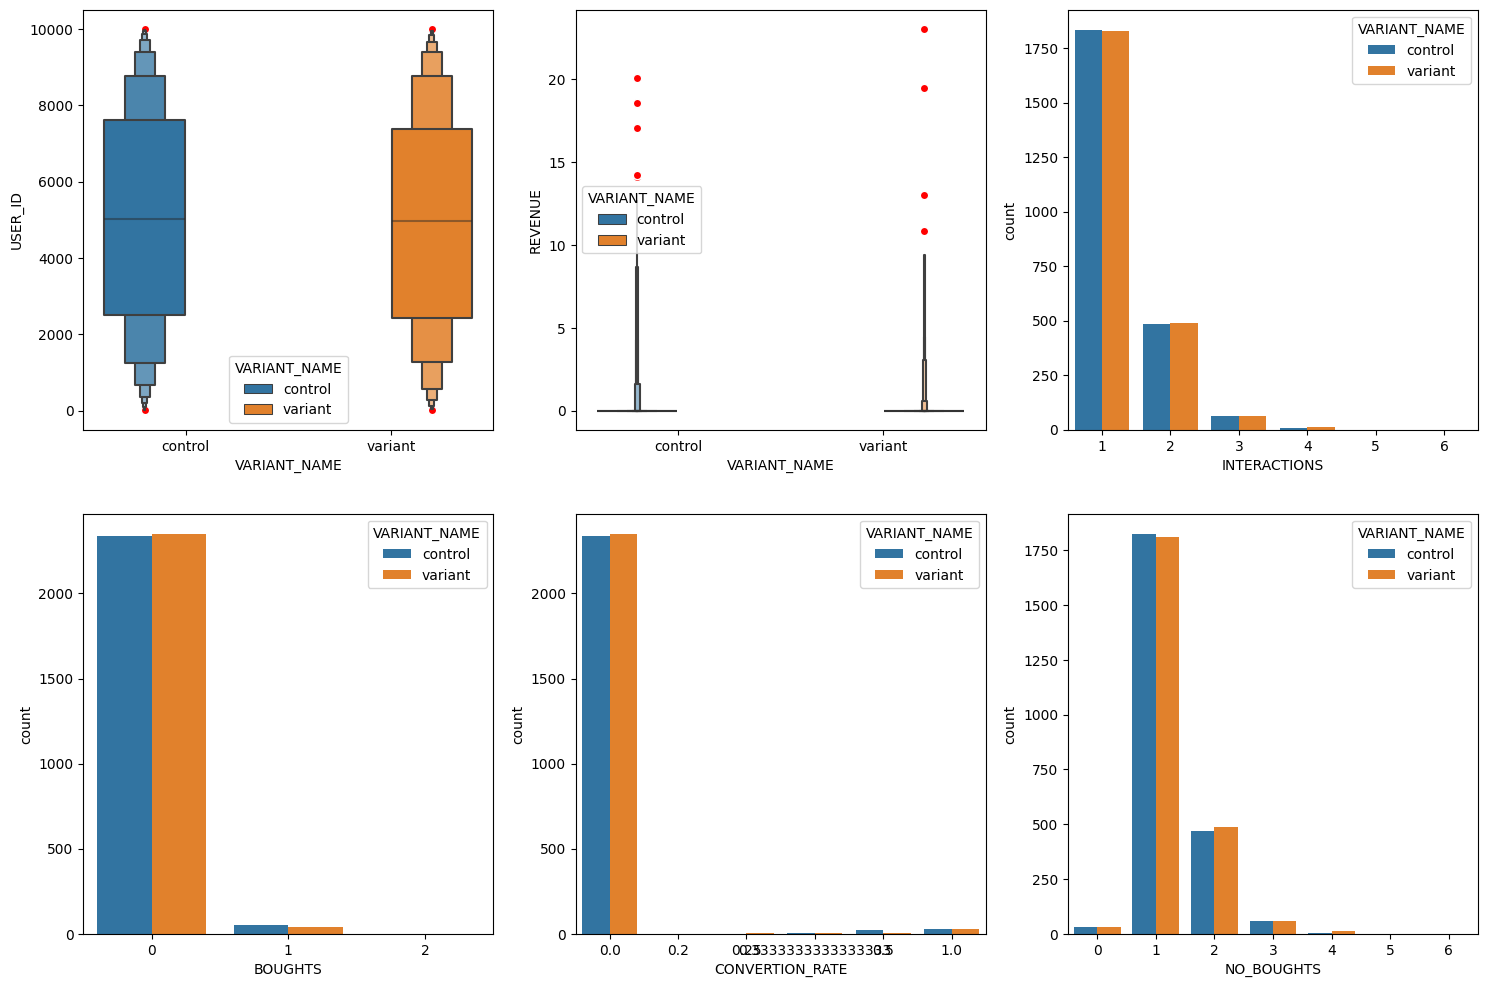

In [31]:
df_grouped_users_num = df_grouped_users.select_dtypes(include='number')
n_cols =  3
red_circle_boxen = dict(color='red', marker='o', edgecolors='white')
# n_rows = int(np.ceil(((df_grouped_users_num.shape[1]-1) / n_cols)))
n_rows = int(np.ceil(((df_grouped_users_num.shape[1]) / n_cols)))
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols,figsize=(18, (n_rows*6)))
for i, column in enumerate(df_grouped_users_num.columns):
  if(len(df_grouped_users_num[column].unique()) <= 24): # "categorical" data
    sns.countplot(
      df_grouped_users[[column, 'VARIANT_NAME']],
      x = column,
      hue="VARIANT_NAME", 
      ax=axes[i//n_cols,i%n_cols],
    )
  else: # if it's not categorical data...

    sns.boxenplot(
      df_grouped_users[[column, 'VARIANT_NAME']],
      x = "VARIANT_NAME",
      hue="VARIANT_NAME", 
      y = column,
      ax=axes[i//n_cols,i%n_cols],
      flier_kws=red_circle_boxen
    )

# A/B Testing

## A/B Testing on Revenue

In [32]:
mean_control = df_grouped_users[df_grouped_users['VARIANT_NAME'] == 'control']['REVENUE'].mean()
mean_variant = df_grouped_users[df_grouped_users['VARIANT_NAME'] == 'variant']['REVENUE'].mean()
print(mean_control)
print(mean_variant)
print(mean_variant - mean_control)

0.10264964420259523
0.07493522774759716
-0.027714416454998073


Based on the calculations for the mean of each group, we make the hyphotesis that the variant group generates less revenue than the control group on average.

H0 = No difference on revenue.

H1 = Variant group generates less revenue.

### Levene test (for equal variances)

Determining if the variances of the samples are equal will help us decide which test are appropiate.

In [77]:
stat, p = stats.levene(
    df_grouped_users[df_grouped_users['VARIANT_NAME'] == 'control']['REVENUE'],
    df_grouped_users[df_grouped_users['VARIANT_NAME'] == 'variant']['REVENUE']
)
print(stat, p)

1.0613290873416377 0.3029643704990575


With a p value of 0.30 we failed to reject the null hypothesis that the samples are from populations with equal variances.

### Permutation test

In [78]:
def permutation_test_mean_difference(x, nA, nB):
    n = nA + nB
    idx_B = set(random.sample(range(n), nB))
    idx_A = set(range(n)) - idx_B
    return x.loc[list(idx_B)].mean() - x.loc[list(idx_A)].mean()
    
nA = df_grouped_users[df_grouped_users['VARIANT_NAME'] == 'control'].shape[0]
nB = df_grouped_users[df_grouped_users['VARIANT_NAME'] == 'variant'].shape[0]
# nA = 5
# nB = 6
print(permutation_test_mean_difference(df_grouped_users['REVENUE'], nA, nB))

-0.05937483174817301


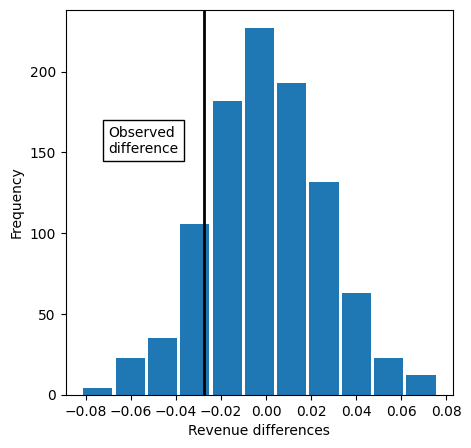

In [79]:
random.seed(1)
perm_diffs = [permutation_test_mean_difference(df_grouped_users['REVENUE'], nA, nB) for _ in range(1000)]

fig, ax = plt.subplots(figsize=(5, 5))
ax.hist(perm_diffs, bins=11, rwidth=0.9)
ax.axvline(x = mean_variant - mean_control, color='black', lw=2)
# ax.text(50, 190, 'Observed\ndifference', bbox={'facecolor':'white'})
ax.text(-0.07, 150, 'Observed\ndifference', bbox={'facecolor':'white'})
ax.set_xlabel('Revenue differences')
ax.set_ylabel('Frequency')

# plt.tight_layout()
plt.show()

What percentage of the mean differences of random permutations are below the observed difference?

In [80]:
perm_diffs = np.array(perm_diffs)
less = np.mean(perm_diffs < mean_variant - mean_control)
more = np.mean(perm_diffs > mean_variant - mean_control)
print(less)
print(more)
print(less + more)

0.135
0.865
1.0


In [36]:
def statistic(x, y, axis):
    return np.mean(x, axis=axis) - np.mean(y, axis=axis)

res = stats.permutation_test(
    (df_grouped_users[df_grouped_users['VARIANT_NAME'] == 'control']['REVENUE'], 
     df_grouped_users[df_grouped_users['VARIANT_NAME'] == 'variant']['REVENUE']),
     statistic,
     vectorized=True
    )
res

PermutationTestResult(statistic=0.027714416454998073, pvalue=0.2982, null_distribution=array([ 0.02615022, -0.00021534, -0.00947507, ...,  0.00337312,
       -0.01599954, -0.02537638]))

In [37]:
res = stats.permutation_test(
    (df_grouped_users[df_grouped_users['VARIANT_NAME'] == 'control']['REVENUE'], 
     df_grouped_users[df_grouped_users['VARIANT_NAME'] == 'variant']['REVENUE']),
     statistic,
     vectorized=True,
     alternative='less'
    )
res

PermutationTestResult(statistic=0.027714416454998073, pvalue=0.8475, null_distribution=array([ 0.00499587,  0.03551869, -0.01305516, ..., -0.01401711,
        0.01674829, -0.02699077]))

In [38]:
res = stats.permutation_test(
    (df_grouped_users[df_grouped_users['VARIANT_NAME'] == 'control']['REVENUE'], 
     df_grouped_users[df_grouped_users['VARIANT_NAME'] == 'variant']['REVENUE']),
     statistic,
     vectorized=True,
     alternative='greater'
    )
res.pvalue

0.1449

### t-Test

In [82]:
# df_grouped_users[df_grouped_users['VARIANT_NAME'] == 'control']['REVENUE']
# df_grouped_users[df_grouped_users['VARIANT_NAME'] == 'variant']['REVENUE']

res = stats.ttest_ind(
    df_grouped_users[df_grouped_users['VARIANT_NAME'] == 'control']['REVENUE'], 
    df_grouped_users[df_grouped_users['VARIANT_NAME'] == 'variant']['REVENUE'],
    equal_var=True,
    alternative='greater'
)
print(f'p-value for single sided test: {res.pvalue}')

p-value for single sided test: 0.15148218524965731


### Mann-Whitney U rank test

In [83]:
statistic, pvalue = stats.mannwhitneyu(
    df_grouped_users[df_grouped_users['VARIANT_NAME'] == 'control']['REVENUE'], 
    df_grouped_users[df_grouped_users['VARIANT_NAME'] == 'variant']['REVENUE'],
    alternative='greater'
    
)
print(pvalue)

2870550.5
0.14567423499143128


## A/B Testing on Boughts

In [84]:
df_contingency = df_grouped_users[['BOUGHTS', 'NO_BOUGHTS', 'VARIANT_NAME']].groupby('VARIANT_NAME').sum()
df_contingency

,BOUGHTS,NO_BOUGHTS
VARIANT_NAME,,
control,52,2972
variant,43,3001


In [85]:
df_contingency.loc['control', 'BOUGHTS']
df_contingency.loc['control'].sum()

3024

In [86]:
df_contingency['NO_BOUGHTS'].sum()

5973

In [87]:
conversion = [0] * df_contingency['NO_BOUGHTS'].sum()
conversion.extend([1] * df_contingency['BOUGHTS'].sum())
conversion = pd.Series(conversion)

In [88]:
observed_difference = df_contingency.loc['control', 'BOUGHTS'] / df_contingency.loc['control'].sum() - df_contingency.loc['variant', 'BOUGHTS'] / df_contingency.loc['variant'].sum()

conversion = [0] * df_contingency['NO_BOUGHTS'].sum()
conversion.extend([1] * df_contingency['BOUGHTS'].sum())
conversion = pd.Series(conversion)

In [89]:
observed_difference

0.003069617392876261

### Permutation test

In [90]:
def permutation_test_proportions(x, nA, nB):
    n = nA + nB
    idx_B = set(random.sample(range(n), nB))
    idx_A = set(range(n)) - idx_B
    return (x.loc[list(idx_A)].sum() / nA) - (x.loc[list(idx_B)].sum() / nB)

Observed difference: 0.3070%


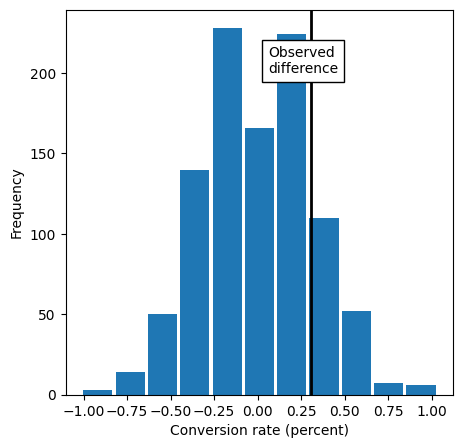

In [91]:
#copia

random.seed(1)
obs_pct_diff = 100 * (52 / 3024 - 43 / 3044)
print(f'Observed difference: {obs_pct_diff:.4f}%')
conversion = [0] * 5973
conversion.extend([1] * 95)
conversion = pd.Series(conversion)

perm_diffs = [100 * permutation_test_proportions(conversion, 3024, 3044) 
              for _ in range(1000)]

fig, ax = plt.subplots(figsize=(5, 5))
ax.hist(perm_diffs, bins=11, rwidth=0.9)
ax.axvline(x=obs_pct_diff, color='black', lw=2)
ax.text(0.06, 200, 'Observed\ndifference', bbox={'facecolor':'white'})
ax.set_xlabel('Conversion rate (percent)')
ax.set_ylabel('Frequency')

# plt.tight_layout()
plt.show()

In [48]:
perm_diffs = np.array(perm_diffs)
print(np.mean([diff > obs_pct_diff for diff in perm_diffs]))

0.131


In [110]:
df_contingency.T.control['BOUGHTS']

52

In [113]:
df_contingency.loc['control'].values

array([  52, 2972])

In [115]:
def statistic(x, y):
    prop_x = x[0] / (x[0] + x[1])
    prop_y = y[0] / (y[0] + y[1])
    diff_prop = prop_x - prop_y
    return diff_prop

res = stats.permutation_test(
    (df_contingency.loc['control'].values, df_contingency.loc['variant'].values),
     statistic
    #  vectorized=True
    #  alternative='greater'
    )
res

PermutationTestResult(statistic=0.003069617392876261, pvalue=1.0, null_distribution=array([ 0.00306962,  0.04979601, -0.96870555,  0.96870555, -0.04979601,
       -0.00306962]))

### z-test

In [49]:
n_boughts = df_contingency['BOUGHTS'].values
n_rows = np.array(df_contingency.sum(axis=1)['control'], df_contingency.sum(axis=1)['variant'])

In [50]:
z_score, p_value = proportions_ztest(count=n_boughts, nobs=n_rows, alternative='two-sided')

In [51]:
z_score, p_value 

(0.9307191648733452, 0.3519988534236914)

### Chi-Square

In [52]:
df_contingency

,BOUGHTS,NO_BOUGHTS
VARIANT_NAME,,
control,52,2972
variant,43,3001


In [53]:
df_contingency.mean()['BOUGHTS']

47.5

In [54]:
df_contingency.sum()['BOUGHTS']

95

In [55]:

df_contingency.sum(axis=1)['control']

3024

In [56]:
ratio_boughts = df_contingency.sum()['BOUGHTS'] / df_contingency.sum().sum()
expected_boughts_control = ratio_boughts * df_contingency.sum(axis=1)['control']
expected_boughts_variant = ratio_boughts * df_contingency.sum(axis=1)['variant']
expected_noboughts_control = df_contingency.sum(axis=1)['control'] - expected_boughts_control
expected_noboughts_variant = df_contingency.sum(axis=1)['variant'] - expected_boughts_variant
expected_boughts = np.array([expected_boughts_control, expected_boughts_variant])
expected_noboughts = np.array([expected_noboughts_control, expected_noboughts_variant])
# expected = [expected_boughts, expected_noboughts]
expected = [expected_noboughts, expected_boughts]
expected

[array([2976.656559, 2996.343441]), array([47.343441, 47.656559])]

In [57]:
df_contingency.T

VARIANT_NAME,control,variant
BOUGHTS,52,43
NO_BOUGHTS,2972,3001


In [58]:
ratio_boughts = df_contingency.sum()['BOUGHTS'] / df_contingency.sum().sum()
expected_boughts_control = ratio_boughts * df_contingency.sum(axis=1)['control']
expected_boughts_variant = ratio_boughts * df_contingency.sum(axis=1)['variant']
expected_noboughts_control = df_contingency.sum(axis=1)['control'] - expected_boughts_control
expected_noboughts_variant = df_contingency.sum(axis=1)['variant'] - expected_boughts_variant
expected_boughts = np.array([expected_boughts_control, expected_boughts_variant])
expected_noboughts = np.array([expected_noboughts_control, expected_noboughts_variant])
expected = [expected_boughts, expected_noboughts]
expected

[array([47.343441, 47.656559]), array([2976.656559, 2996.343441])]

In [59]:
chisq, pvalue, df, expected = stats.chi2_contingency(df_contingency)
print(f'Observed chi2: {chisq:.4f}')
print(f'p-value: {pvalue:.4f}')
print(f'df: {df}')
print(f'expected: {expected}')

Observed chi2: 0.7390
p-value: 0.3900
df: 1
expected: [[  47.343441 2976.656559]
 [  47.656559 2996.343441]]


In [60]:
chisq, pvalue, df, expected = stats.chi2_contingency(df_contingency.T)
print(f'Observed chi2: {chisq:.4f}')
print(f'p-value: {pvalue:.4f}')
print(f'df: {df}')
print(f'expected: {expected}')

Observed chi2: 0.7390
p-value: 0.3900
df: 1
expected: [[  47.343441   47.656559]
 [2976.656559 2996.343441]]


In [61]:
boughts = np.array([[52, 2972], [43, 3001]])
chisq, pvalue, df, expected = stats.chi2_contingency(boughts)
print(f'Observed chi2: {chisq:.4f}')
print(f'p-value: {pvalue:.4f}')
print(f'df: {df}')
print(f'expected: {expected}')

Observed chi2: 0.7390
p-value: 0.3900
df: 1
expected: [[  47.343441 2976.656559]
 [  47.656559 2996.343441]]


In [62]:
boughts

array([[  52, 2972],
       [  43, 3001]])

### Fisher's Exact Test

In [63]:
# Tabla de contingencia
table = np.array([[52, 43], [2972, 3001]])

# Aplicar el Test Exacto de Fisher
odds_ratio, p_value = stats.fisher_exact(table)

In [64]:
p_value

0.35327241173355184